In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats

#IMPORTANT: Please read all comments 

In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


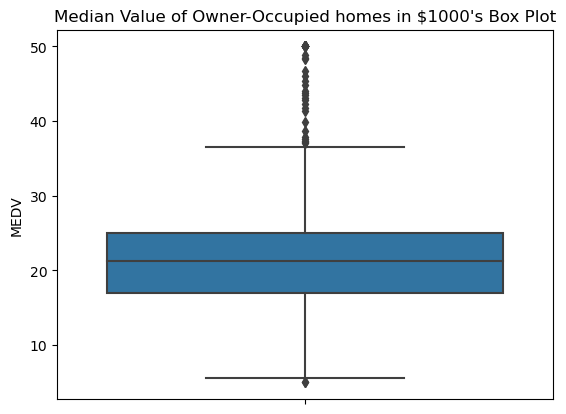

In [4]:
ax = sns.boxplot(y='MEDV', data=df)
plt.title("Median Value of Owner-Occupied homes in $1000's Box Plot")
plt.show()


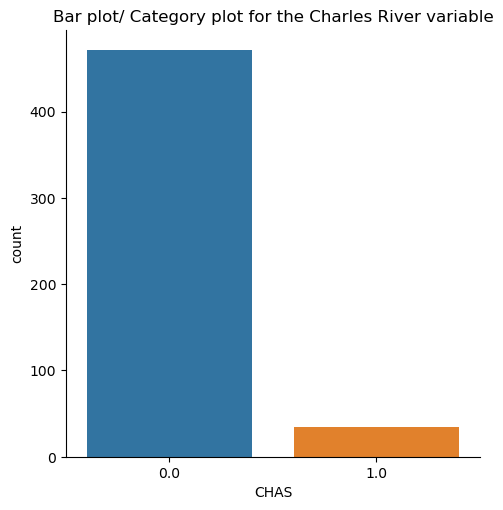

In [5]:
sns.catplot(x='CHAS', kind='count', data=df)
plt.title("Bar plot/ Category plot for the Charles River variable")
plt.show()
#1 represents the tract bounding the river, 0 represents this negation

In [6]:
df.loc[(df['AGE']<=35), 'age_group'] = '35 and younger'
df.loc[(df['AGE']>35) & (df['AGE']<70), 'age_group'] = 'between 35 and 70'
df.loc[(df['AGE']>=70), 'age_group'] = 'seventy_plus'      


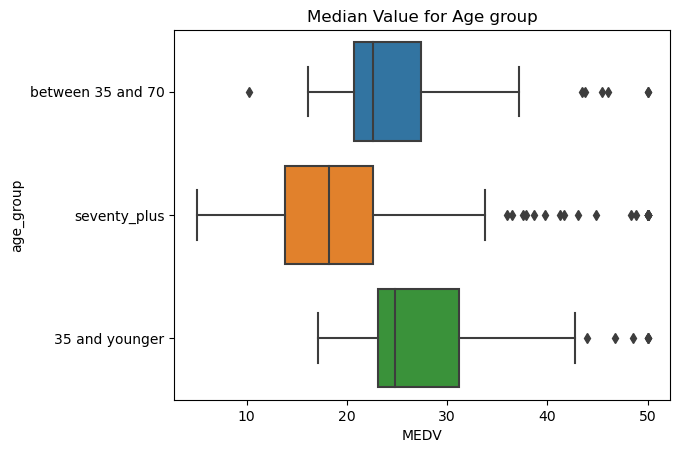

In [7]:
ax = sns.boxplot(x='MEDV', y='age_group', data=df)
plt.title("Median Value for Age group")
plt.show()


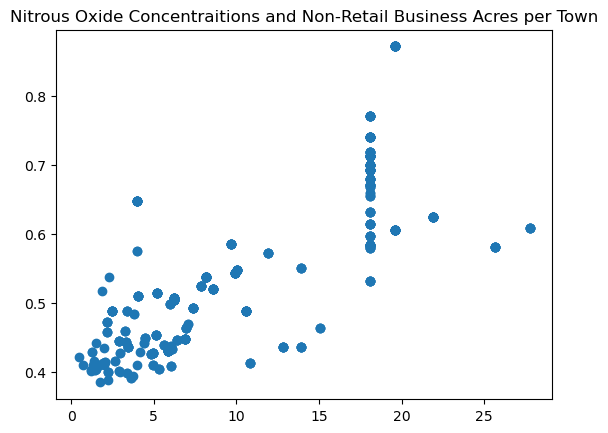

In [8]:
ax = plt.scatter(x='INDUS', y= 'NOX', data=df)
plt.title("Nitrous Oxide Concentraitions and Non-Retail Business Acres per Town")
plt.show()

In [9]:
"""Nitrous oxide and the proportion of non retail business acres per town appear to have a linear relationship, a positive correlation
"""

'Nitrous oxide and the proportion of non retail business acres per town appear to have a linear relationship, a positive correlation\n'

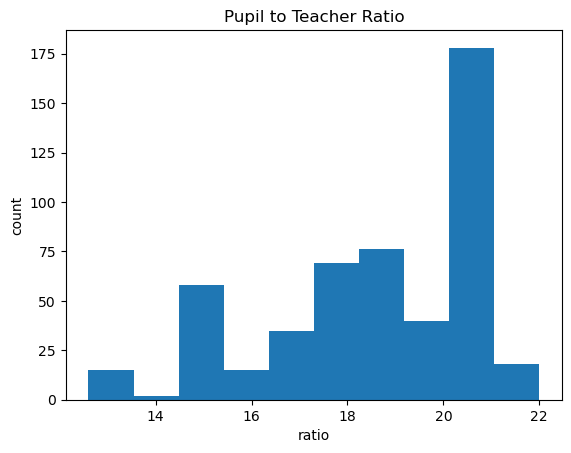

In [10]:

plt.hist(df['PTRATIO'])
plt.title("Pupil to Teacher Ratio")
plt.ylabel("count")
plt.xlabel("ratio")
plt.show()

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [11]:
#alpha is set to 0.05 (for reference)
a = 0.05

In [12]:
#H0: there is no difference between the variances
#H1: there is a difference between the variances

In [13]:
#levene test to check for variance
scipy.stats.levene(df[df['CHAS'] == 0]['MEDV'],
                   df[df['CHAS'] == 1]['MEDV'], center='mean')


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [14]:
"""since the p value is less than 0.05 then we cannot assume equality of variance
"""

'since the p value is less than 0.05 then we cannot assume equality of variance\n'

In [15]:
#H0: There is no significant difference between the means of the median values of houses bounded by the Charles river
#H1: There is significant difference between the means of the median values of houses bounded by the Charles river

In [16]:
#ttest for significance between the value of houses bounded by the Charles river and those not
scipy.stats.ttest_ind(df[df['CHAS'] == 0]['MEDV'],
                   df[df['CHAS'] == 1]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

In [17]:
"""as the p value is less than 0.05 we reject the null hypothesis as there is significant evidence to suggest that there is a statistical difference in 
median values of houses bounded by the Charles river
"""

'as the p value is less than 0.05 we reject the null hypothesis as there is significant evidence to suggest that there is a statistical difference in \nmedian values of houses bounded by the Charles river\n'

In [18]:
#H0: there is no difference between the variances
#H1: there is a difference between the variances

In [19]:
#performing another levene test for variance before the ANOVA
scipy.stats.levene(df[df['age_group'] == '35 and younger']['MEDV'],
                   df[df['age_group'] == 'between 35 and 70']['MEDV'], 
                   df[df['age_group'] == 'seventy_plus']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [20]:
"""since the p value is greater than 0.05 we fail to reject the null hypothesis
as there is significant evidence to suggest that the variances are equal, 
this may effect the outcome of the ANOVA
"""

'since the p value is greater than 0.05 we fail to reject the null hypothesis\nas there is significant evidence to suggest that the variances are equal, \nthis may effect the outcome of the ANOVA\n'

In [21]:
thirtyfive_lower = df[df['age_group'] == '35 and younger']['MEDV']
thirtyfive_to_seventy = df[df['age_group'] == 'between 35 and 70']['MEDV']
seventy_plus = df[df['age_group'] == 'seventy_plus']['MEDV']


In [22]:
#H0: The means of the median value of houses per proportion of owner occupied units built prior to 1940 do not differ
#H1: The means of the median value of houses per proportion of owner occupied units built prior to 1940 do differ 

In [23]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_to_seventy, seventy_plus)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [24]:
"""since the p value is smaller than 0.05 we reject the null hypothesis, 
as there is significant evidence to suggest statistical significance,
as at least one of the means differ
"""

'since the p value is smaller than 0.05 we reject the null hypothesis, \nas there is significant evidence to suggest statistical significance,\nas at least one of the means differ\n'

In [25]:
scipy.stats.pearsonr(df['NOX'], df['INDUS'])

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061242812e-98)

In [26]:
"""We have a strong positive correlation coefficient of 0.76 
with a p value less than 0.05 we reject the null hypothesis, concluding there is an 
existence of a relationship between the two variables
"""

'We have a strong positive correlation coefficient of 0.76 \nwith a p value less than 0.05 we reject the null hypothesis, concluding there is an \nexistence of a relationship between the two variables\n'

In [27]:
import statsmodels.api as sm
#independant variable: the distance to the five boson employment centres
X = df['DIS']
#dependant variable: the median value of owner occupied homes
y= df['MEDV']
# adding an intercept (beta_0) 
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           1.21e-08
Time:                        11:21:11   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
"""
The coefficient DIS of 1.0916 indicates that an additional weighted distance 
to the employment centers increases the median value (of owner occupied homes) by 1.0916

Also worth noting as the p value is less than 0.05 we reject the null hypothesis as there
is evidence that there is a difference in median housing value based on 
distance to the Boston employment centres
"""

'\nThe coefficient DIS of 1.0916 indicates that an additional weighted distance \nto the employment centers increases the median value (of owner occupied homes) by 1.0916\n\nAlso worth noting as the p value is less than 0.05 we reject the null hypothesis as there\nis evidence that there is a difference in median housing value based on \ndistance to the Boston employment centres\n'